<a href="https://colab.research.google.com/github/MorganBaccus/CptS-437/blob/main/Baccus_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment #4**

Assigned: March 5, 2021

Due: March 24, 2021



---

This assignment consists of questions that require a short answer and one Python programming task. You can enter your answers and your code directly in a Colaboratory notebook and upload the **shareable** link for your notebook as your homework submission.


---

#1.

 (10 points) Consider the subset of (x,y) points shown below. These are actually a subset of the data points found in the sklearn diabetes dataset.

x | y
--- | ---
 0.08 | 233
-0.04 | 91
 0.01 | 111
-0.04 | 152
-0.03 | 120
 0.01 | 67
 0.09 | 310
-0.03 | 94
-0.06 | 183
-0.03 | 66
 0.06 | 173
-0.06 | 72
 0.00 | 49
-0.02 | 64
-0.07 | 48


For a candidate linear regressor with parameters $\Theta_0 = 75.1$ and $\Theta_1 = -0.001$, calculate the mean squared error with respect to the data points and perform one iteration of gradient descent , assuming $\alpha = 0.01$. Show all of your work.


Answer:

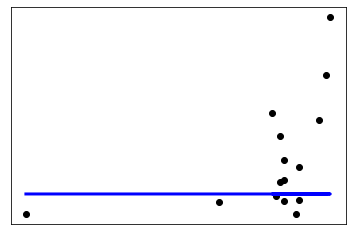

epoch:  0 error:  3762.0882962186774 theta0:  82.1649907 theta1:  0.18870489999999993
diff0:  706.4990700000003
diff1:  18.97048999999999


In [ ]:
"""
This is the example from class that shows how to use Linear Regression to decrease error
-Using hard coded data
"""
import matplotlib.pyplot as plt
import numpy as np
 
x = [.08, -.04, .01, -.04, -.03, .01, .09, -.03, -.06, -.03, .06, -.05, 0, -.2, -.7]
y = [233, 91, 111, 152, 120, 67, 310, 94, 183, 66, 173, 72, 49, 64, 48]
ypred = [0.0] * 15
 
n = len(x)
alpha = 0.01 #learning rate
theta0 = 75.1
theta1 = -.001
num_iterations = 1
 
epochs = 0
while epochs < num_iterations:
  for i in range(n):
    ypred[i] = theta0 + theta1 * x[i] #def of h(x)
  if epochs == 0 or epochs == (num_iterations - 1):
    plt.scatter(x, y, color='black')
    plt.plot(x, ypred, color='blue', linewidth = 3)
    plt.xticks(())
    plt.yticks(())
    plt.show()
  error = 0
  total_diff0 = 0
  total_diff1 = 0
  for i in range(n):
    diff = y[i] - ypred[i]
    total_diff0 += diff
    total_diff1 = diff * x[i]
    error += diff**2
  error /= 2 * len(y)
 
  theta0 += alpha * total_diff0
  theta1 += alpha * total_diff1
  print('epoch: ', epochs, 'error: ', error, 'theta0: ', theta0, 'theta1: ', theta1)
  print('diff0: ', total_diff0)
  print('diff1: ', total_diff1)
  epochs +=1

---

#2.

(15 points) Explain what value is generated by the equation $h(x) = \frac{1}{1+e^{-(\Theta_0 + \Theta_1 x)}}$ in logistic regression. What steps are taken to convert the linear regression algorithm into the classification-based logistic regression algorithm?


Answer:

The equation h(x) calculates the probability that x will be in the positive class.

In order to convert the linear regression algorithm into the classification-based logistic regression algorithm, we must first modify the decision boundary to smooth out when it reaches y=0 and y=1. This is essentially making the decision boundary into a sigmoid function. We must also update the linear regression cost function so that is can handle gradient descent. The logistic regression algoithm's cost function is $Cost(h(x),y) = -ylog(h(x)-((-y)log(1-h(x))$. 

---

#3.

(12 points) Regularization is introduced in class as a numeric term that can be incorporated into a loss function. This is straightforward for algorithms such as neural networks that seek to optimize a numeric loss function. Here, explain possible ways regularization can be used to fine tune other types of algorithms, specifically decision trees and naive Bayes classifiers.

Answer:

Regularization is applied to decision trees by pruning the learned tree. Too much pruning can result in underfitting the data and too little pruning can result in overfitting the data. Naive Bayes will include all of the features when calculating the most likely. Then through regularixzation, you can prune the features that are irrelevant or redundant.


---

#4.

(80 points) The goal of this program is to give you detailed experience with naive Bayes classifiers as well as with text mining methods and libraries. In this program, you are tasked with writing a naive Bayes classifier to classifier phone messages as spam versus not spam (ham). To test your program, use the labeled data available from the UCI machine learning repository at https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection. The data is also available at https://drive.google.com/file/d/1nn2baOauApGbxrOeTb4l-30Qz1prPIS3/view?usp=sharing.

You will need to read in each message and convert it to a set of features. Use the sklearn libraries to

- remove punctuation
- convert to lower case
- create a bag of words vector that stores term frequency
- filter out words from the stop list (stop_words)
- include 1-grams and 2-grams
- normalize frequences based on document length (tfidf)

Report performance of your classifier on 3-fold cross validation in terms of accuracy and macro f1 score.

Additionally, notice that the class distribution is imbalanced. There are 4,827 legitimate messages and 747 spam messages. Experiment with three alternative methods for addressing this issue and report impact of each method on performance.

- Undersample the majority class so they are balanced.
- Oversample the minority class so they are balanced.
- Weight the data points based on class imbalance.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import stop_words
from sklearn.utils.class_weight import compute_sample_weight
from nltk.tokenize import TreebankWordTokenizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import pandas as pd
import pprint
import string
import copy

from google.colab import drive
drive.mount('/content/gdrive')


def read_data():
  infile = open('/content/gdrive/My Drive/CptS437/SMSSpamCollection')
  data = []
  y = []
  for line in infile:
    vector = line.strip().lower().split('\t')
    data.append(vector[1])
    y.append(vector[0])
  return data, y


def learn(X, y, weights):
  # Train our naive Bayes classifier on our data
  clf = MultinomialNB().fit(X, y, sample_weight=weights)
  scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
  print('Accuracy over 3 folds:', np.mean(scores))
  scores = cross_val_score(clf, X, y, cv=3, scoring='f1_macro')
  print('Macro f1 score over 3 folds:', np.mean(scores))


def main():
  data, y = read_data()
  count_vect = CountVectorizer()
  tokenizer = TreebankWordTokenizer()
  count_vect.set_params(tokenizer=tokenizer.tokenize)

  # 1-grams and 2-grams
  count_vect.set_params(ngram_range=(1,2))

  X_counts = count_vect.fit_transform(data)

  # Normalize counts and weight common words low
  tfidf_transformer = TfidfTransformer()
  X_tfidf = tfidf_transformer.fit_transform(X_counts)


  # Learn with undersampling the majority class
  print('Undersampling the Majority Class:')
  undersample = RandomUnderSampler(sampling_strategy='majority')
  X_tfidfu, yu = undersample.fit_resample(X_tfidf, y)
  clfu = MultinomialNB().fit(X_tfidfu, yu)
  scoresAcc = cross_val_score(clfu, X_tfidfu, yu, cv=3, scoring='accuracy')
  print('Number of samples: ', len(yu))
  print('3-fold accuracy: ', np.mean(scoresAcc))
  scoresF1 = cross_val_score(clfu, X_tfidfu, yu, cv=3, scoring='f1_macro')
  print('3-fold macro f1: ', np.mean(scoresF1), '\n')

 # Learn with oversampling the minority class 
  print('Oversampling the Minority Class:')
  oversample = RandomOverSampler(sampling_strategy='minority')
  X_tfidfo, yo = oversample.fit_resample(X_tfidf, y)
  clfo = MultinomialNB().fit(X_tfidfo, yo)
  scoresAcc = cross_val_score(clfo, X_tfidfo, yo, cv=3, scoring='accuracy')
  print('Number of samples: ', len(yo))
  print('3-fold accuracy: ', np.mean(scoresAcc))
  scoresF1 = cross_val_score(clfo, X_tfidfo, yo, cv=3, scoring='f1_macro')
  print('3-fold macro f1: ', np.mean(scoresF1), '\n')

  # Learn with equal weights and no sampling
  print('Unweighted:')
  weights = np.full(len(y), 1.0, dtype=float)
  learn(X_tfidf, y, weights)

  # Learn with weights inversely proportional to class size
  weights = compute_sample_weight("balanced", y)
  print('Weighted:')
  print('Weights', weights)
  learn(X_tfidf, y, weights)

  return


main()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Undersampling the Majority Class:
Number of samples:  1494
3-fold accuracy:  0.9618473895582329
3-fold macro f1:  0.9618394655377521 

Oversampling the Minority Class:
Number of samples:  9654
3-fold accuracy:  0.9925419515226849


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


3-fold macro f1:  0.9925417490591067 

Unweighted:
Accuracy over 3 folds: 0.923394330821672
Macro f1 score over 3 folds: 0.7786465483571515
Weighted:
Weights [0.57737725 0.57737725 3.73092369 ... 0.57737725 0.57737725 0.57737725]
Accuracy over 3 folds: 0.923394330821672
Macro f1 score over 3 folds: 0.7786465483571515



---

#5.

(10 points, part of semester project grade)

Provide a proposal of your semester project. The proposal is typically 1-2 paragraphs long and should include the goal of your project, a description of the data you will use and any necessary data cleaning / preparation steps you will need to perform, the methods you will create or apply, and how you will evaluate the results. If you are working on a multi-person project team, clearly state the role of each person on the team in contributing to the project goal.



Morgan Baccus and Brenden Nelson

For our semester project we are going to modify the decision tree algorithm to predict if an accident will be light or fatal. Our data shows if an accident is light or fatal based on a number of features such as date, time, longitude, latitude, and many more. This data is provided on Kaggle as part of the Road Accidents in U.K. data collection. As many values are missing for some features, we will not be analyzing them. Looking at the data, it appears that there is an imbalance between the light and fatal classifications. We may need to address the imbalance by removing some of the larger class or by assigning weights. Additionally, we will be using cross-validation when analyzing the data so that we can look at different segments as training and testing each time. We will be looking at accuracy and a confusion matrix to evaluate the results of our algorithm. This will provide several calculations for us to compare how well our algorithm performed.

Morgan will clean and prepare the data. This will include eliminating the features that have too many missing values, fixing the class imbalance if there is one, and whatever else needs to be done for our algorithm to be able to process the data. We will work on building the decision tree algorithm together as this is the main part of the project. Brenden will then go through and prune the tree. Morgan will implement the necessary functions to evaluate our tree. Brenden will then continue to prune the tree until the best results are achieved.
